Import required libaries

In [2]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

C:\Users\hajir\AppData\Local\Temp\ipykernel_23176\418246984.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Then we insert all the required connection properties

In [3]:
conn = pyodbc.connect('Driver={SQL Server};' # This is what server type we are connecting to
                      'Server=HAJIRA_FAHEEM\SERVER1;' # This is the location and name of the server, same as what we use to connect using SSMS
                      'Database=AdventureWorks2019;' # This is which database we are connecting to within the selected server
                      'Trusted_Connection=yes;') # This allows us to forgo entering a trusted key or password because we are the admin of this computer and the...
                    # ... database has been configured to allow this user when we set it up. 

Now we create the cursor

In [4]:
cursor = conn.cursor()

Here we define what query we want executed in the database

In [5]:
#Query contains details of the store size and the average revenue, known as the variable 'salesdata'
query = 'SELECT * FROM storesize_rev'
# Query 2 links to a view on SQL server; contains no of employees in groups of 10 vs avg revenenue. known as the variable 'employee'
query2 = 'SELECT * FROM Employee_AVGrevenue'
#Query 3 contains continuous varibles of no of employees and avg revenue, known as the variable'employeedata'
query3= 'SELECT * FROM no_employees_rev'
query4 = 'SELECT * FROM storedata'

Here we assign the resulting table returned from the database as variables 'salesdata', 'employee', 'employeedata' and 'storedata'
This is also where our connection actually runs using the defined properties and query above

In [6]:
salesdata = pd.read_sql(query, conn)
employee = pd.read_sql(query2, conn)
employeedata = pd.read_sql(query3, conn)
storedata = pd.read_sql(query4, conn)

C:\Users\hajir\AppData\Local\Temp\ipykernel_23176\2547547362.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salesdata = pd.read_sql(query, conn)
C:\Users\hajir\AppData\Local\Temp\ipykernel_23176\2547547362.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employee = pd.read_sql(query2, conn)
C:\Users\hajir\AppData\Local\Temp\ipykernel_23176\2547547362.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employeedata = pd.read_sql(query3, conn)
C:\Users\hajir\AppData\Local\Temp\ipykernel_23176\2547547362.py:4: UserWarn

Let's get a preview of what our data looks like:

In [7]:
#Prints the first 5 rows of the following variables:
print(salesdata.head())
print(employee.head())
print(employeedata.head())
print(storedata.head())


   Store_Size  AVG_Revenue
0        6000      30000.0
1        7000      30000.0
2        8000      30000.0
3        9000      30000.0
4       10000      30000.0
  No_of_employees  AVG_Revenue
0            0-10   38962.2641
1           11-20   81625.0000
2           21-30  106666.6666
3           31-40  150000.0000
4           41-50  150000.0000
   Number_of_Employees  Revenue
0                    2  30000.0
1                    3  30000.0
2                    4  30000.0
3                    5  30000.0
4                    6  30000.0
   No_of_employees  Store_Size  AVG_Revenue
0                2        6000      30000.0
1                4        6000      30000.0
2                5        6000      30000.0
3                2        7000      30000.0
4                4        7000      30000.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


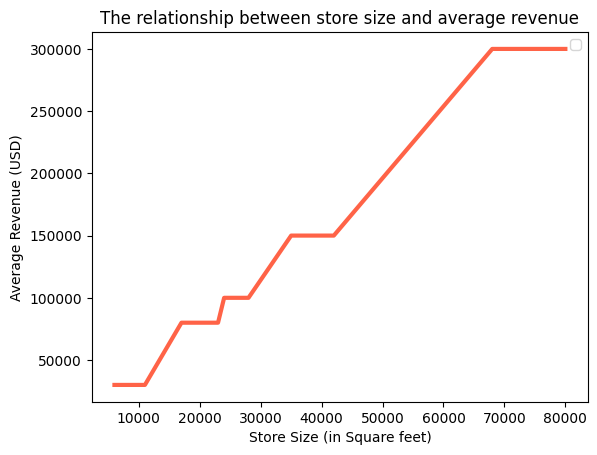

In [8]:
# Visualising the relationship between Store size vs avg revenue, using line plot with customisation.
plt.plot(salesdata.Store_Size, salesdata.AVG_Revenue, color = 'tomato', linewidth = 3)
plt.xlabel('Store Size (in Square feet)')
plt.ylabel('Average Revenue (USD)')
plt.title('The relationship between store size and average revenue')
plt.legend()
# Show the data in a chart
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


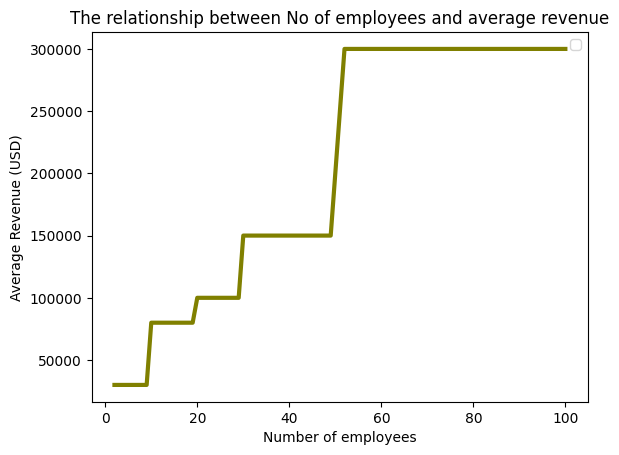

In [9]:
# Visualising the relationship between number of employees vs avg revenue, using line plot with customisation.
plt.plot(employeedata.Number_of_Employees, employeedata.Revenue, color = 'olive',linewidth = 3)
plt.xlabel('Number of employees')
plt.ylabel('Average Revenue (USD)')
plt.title('The relationship between No of employees and average revenue')
plt.legend()
# Show the data in a chart
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


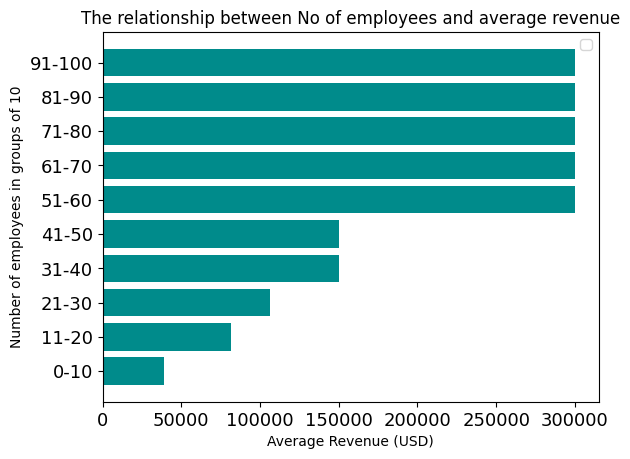

In [10]:
# Visualising the relationship between No of employees (in groups of 10) vs avg revenue, using horizontal bar chart with customisation.
plt.barh(employee.No_of_employees, employee.AVG_Revenue, color = 'darkcyan')
plt.ylabel('Number of employees in groups of 10')
plt.xlabel('Average Revenue (USD)')
plt.yticks(fontsize = 13)
plt.xticks(fontsize = 13)
plt.title('The relationship between No of employees and average revenue')
plt.legend()
# Show the data in a chart
plt.show()

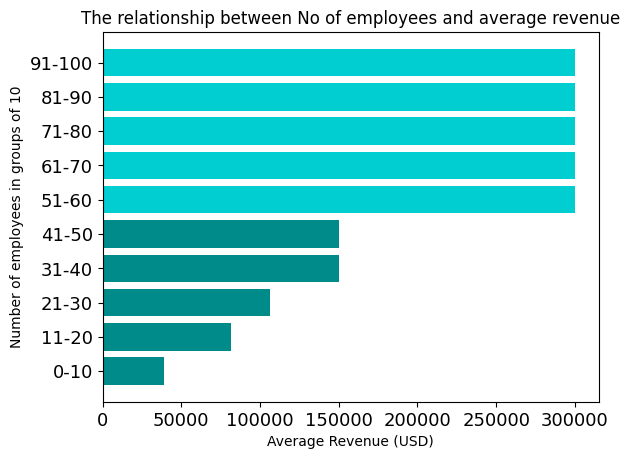

In [11]:
# Visualising the relationship between No of employees (in groups of 10) vs avg revenue, using horizontal bar chart with customisation.
# Highlighting the top 5 groups of number of employees
x=['1','2','3','4','5','6','7','8','9','10']
colors = ['darkcyan', 'darkcyan', 'darkcyan', 'darkcyan', 'darkcyan', 'darkturquoise', 'darkturquoise', 'darkturquoise' ,'darkturquoise', 'darkturquoise']
plt.barh(employee.No_of_employees, employee.AVG_Revenue, color = colors)
plt.ylabel('Number of employees in groups of 10')
plt.xlabel('Average Revenue (USD)')
plt.yticks(fontsize = 13)
plt.xticks(fontsize = 13)
plt.title('The relationship between No of employees and average revenue')
# Show the data in a chart
plt.show()

Text(0.5, 1.0, 'Distribution of Number of employees')

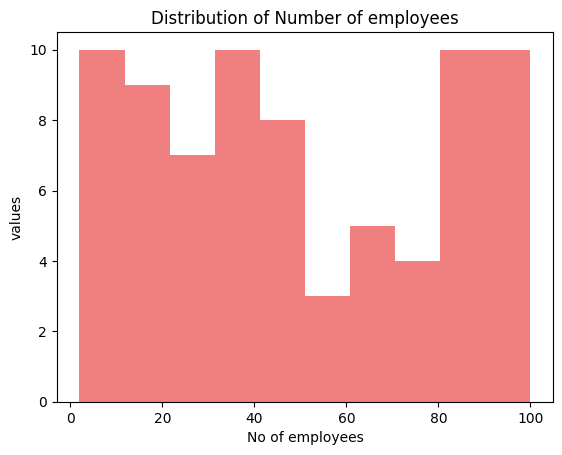

In [12]:
# Visualising the distribution of number of employees, using line plot with customisation.
plt.hist(employeedata.Number_of_Employees,color = 'lightcoral')
plt.xlabel('No of employees')
plt.ylabel('values')
plt.title('Distribution of Number of employees')

Text(0.5, 1.0, 'Distribution of Average Revenue')

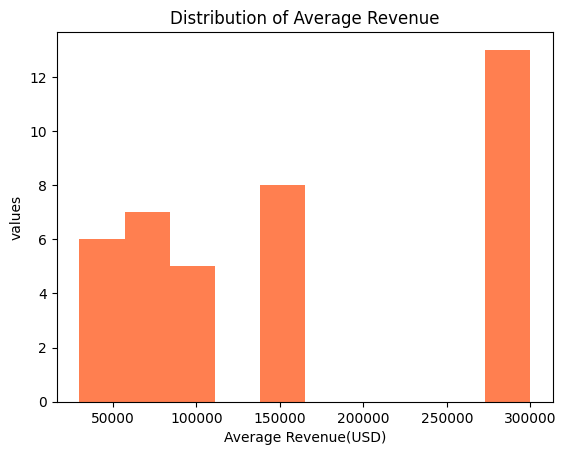

In [13]:
plt.hist(salesdata.AVG_Revenue, color = 'coral')
plt.ylabel('values')
plt.xlabel('Average Revenue(USD)')
plt.title('Distribution of Average Revenue')

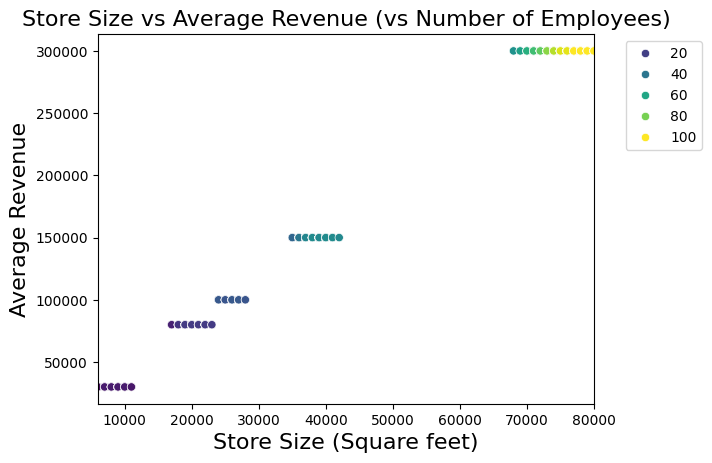

In [14]:
# Scatter plot using Seaborn for the overall relation
sns.scatterplot(data=storedata, x='Store_Size', y='AVG_Revenue', hue='No_of_employees', palette='viridis')

# Set labels and title
plt.xlabel('Store Size (Square feet)', fontsize = 16)
plt.ylabel('Average Revenue',fontsize = 16)
plt.title('Store Size vs Average Revenue (vs Number of Employees)', fontsize = 16)

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust x-axis limits
plt.xlim(storedata['Store_Size'].min(), storedata['Store_Size'].max())
# Turn off grid lines
plt.grid(False)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
# Show the plot
plt.show()

In [15]:
# Calculate correlation coefficient between average revenue and store size
correlation_coefficient_Storesize = np.corrcoef(storedata['AVG_Revenue'], storedata['Store_Size'])[0, 1]
print("Correlation coefficient between AVG_Revenue and Store_Size:", correlation_coefficient_Storesize)

Correlation coefficient between AVG_Revenue and Store_Size: 0.9966787612732606


In [16]:
# Calculate correlation coefficient between average revenue and Number of employees
correlation_coefficient_Employees = np.corrcoef(storedata['AVG_Revenue'], storedata['No_of_employees'])[0, 1]
print("Correlation coefficient between AVG_Revenue and No_of_employees:", correlation_coefficient_Employees)

Correlation coefficient between AVG_Revenue and No_of_employees: 0.9540104301785124
